<a href="https://colab.research.google.com/github/Marc-Elie210/My_Basic_Python/blob/master/Group_911EmergencyCalls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Case Study

Congrats! You have been contracted to conduct a brief analysis of a dataset containing ememrgency calls in order to determine the allocation of funds to you local authorities.  This analysis will play a role in deciding changes to the emergency response department.

The data is based in 911 emergency calls and your job is to determine a variety of issues regarding said calls.

1. Using Pandas and Numpy, analyse the data and come up with 5 questions that you would like to answer about the data.

2. the instructor will provide a rnage of questions to answer and you should use your knowledge to complte them as a team.

We are importing the libraries 
- Pandas & Numpy for data manipulation and calculations 
- Matplot and seaborn for visualization 

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set() #sets axes of graphs in the the background color

Mounting our drive

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing and reading our data using pandas

In [36]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/911 Calls Project/DATA/911.csv')

Examining our data using .head() and .info() to see what is in our dataset.
This allows us to begin to formulate questions.


In [37]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [39]:
missing_values =['n/a','na','--','-']
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/911 Calls Project/DATA/911.csv', na_values = missing_values)

QUESTIONS 

# 1. What zip code had the most 911 calls?
# 2. Whats the most common call reason?
# 3. Which town had the least amount of 911 calls?
# 3b. What were the top 4 towns with the most amount of calls?
# 4. What was the most recent 911 call?
# 5. Whats the average (mean) 911 calls per year?

1.What zip code had the most 911 calls?

In [40]:
df['zip'].value_counts().head(10)
print('The top 10 zip codes with the most 911 calls were: \n', df['zip'].value_counts().head(10))

The top 10 zip codes with the most 911 calls were: 
 19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
19002.0    3050
19468.0    2990
19454.0    2781
19090.0    2635
19038.0    2578
Name: zip, dtype: int64


No handles with labels found to put in legend.


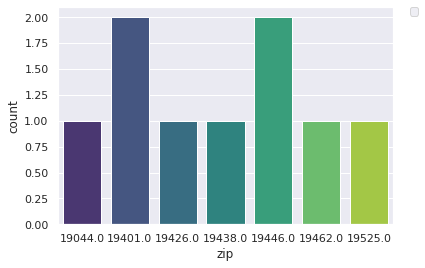

In [41]:
sns.countplot(x = 'zip', data = df.head(11), palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#our histogram doesn't reflect the proper zip codes which had the most 911 calls.
#This reflects the first few zip codes in the dataset and the count of them.

2.Whats the most common call reason?

In [42]:
df['title'].value_counts().head(1)
print('The most common call reason was:\n',df['title'].value_counts().head(1))

The most common call reason was:
 Traffic: VEHICLE ACCIDENT -    23066
Name: title, dtype: int64


3.Which town had the least amount of 911 calls?


In [43]:
df['twp'].value_counts().tail(1)
print('The town with the least amount of 911 calls was:\n',df['twp'].value_counts().tail(1))

The town with the least amount of 911 calls was:
 LEHIGH COUNTY    30
Name: twp, dtype: int64


3b.What were the top 4 towns with the most amount of calls?


In [44]:
listValues = pd.value_counts(df['twp']).iloc[:4]
print('The top four towns with the most amount of calls were:\n', pd.value_counts(df['twp']).iloc[:4])

The top four towns with the most amount of calls were:
 LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
Name: twp, dtype: int64


Plot based on towns and how many calls were reported on each town


How Many Calls Were Reported In Each Town 
 AxesSubplot(0.125,0.125;0.775x0.755)


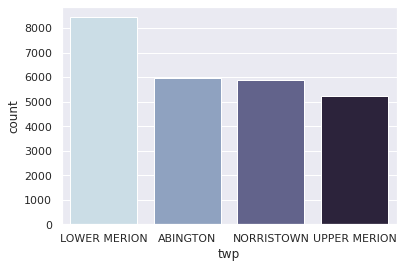

In [45]:
print('How Many Calls Were Reported In Each Town \n', sns.countplot(x='twp', data=df,palette='ch:s=.25,rot=-.25', order=df.twp.value_counts().iloc[:4].index))

4.What was the most recent 911 call?


In [46]:
df['timeStamp'].max()
print('Our data shows that the most recent call was on '+ str(df['timeStamp'].max()))

Our data shows that the most recent call was on 2016-08-24 11:17:02


5.How many 911 calls per year?


In [47]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'], format='%Y-%m-%d %H:%M:%S')
time = df['timeStamp'].iloc[0]
df['Year'] = df['timeStamp'].apply(lambda x: x.year)

print('The number of 911 calls per year:\n', df.groupby('Year').count()['twp'])


The number of 911 calls per year:
 Year
2015     7963
2016    91486
Name: twp, dtype: int64


This function asks the user to type the name of a town to get the amount of calls generated from that particular area.

In [48]:
userInput = input("Please type a towns name: ")
print(f"The amount of calls in town {userInput.upper()} are {df[df.twp == userInput.upper()].shape[0]}")

Please type a towns name: Abington
The amount of calls in town ABINGTON are 5977
